In [2]:
import pandas as pd

## Đọc file csv, join 2 dataframe

In [3]:
job_skills = pd.read_csv('./job_skills.csv')
linkedin_job_posting = pd.read_csv('./linkedin_job_postings.csv')
linkedin_job_posting = pd.merge(linkedin_job_posting, job_skills, on='job_link', how = 'inner')

In [4]:
print(linkedin_job_posting.shape)
print(linkedin_job_posting.columns)

(1048575, 15)
Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type', 'job_skills'],
      dtype='object')


In [5]:
print(job_skills.shape)
print(job_skills.columns)

(1048575, 2)
Index(['job_link', 'job_skills'], dtype='object')


In [6]:
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/triage-rn-m...,2024-01-19 14:39:50.208885+00,t,t,f,Triage RN- Michigan Heart AA office,Trinity Health,"Ypsilanti, MI",2024-01-15,Monroe,United States,Cardiologist,Mid senior,Onsite,"Cardiac Nursing, Patient Education, Liaison, M..."
1,https://www.linkedin.com/jobs/view/finance-man...,2024-01-19 14:39:50.288894+00,t,t,f,Finance Manager,Aston Carter,"Southlake, TX",2024-01-17,Corinth,United States,Supervisor Line Department,Mid senior,Onsite,"Budgeting, Budgeting Analytics, Cognos, Data A..."
2,https://www.linkedin.com/jobs/view/ultrasound-...,2024-01-19 14:39:50.450851+00,t,t,f,Ultrasound Technologist- Registered,Opelousas General Health System,"Opelousas, LA",2024-01-14,Lafayette,United States,Manager Employment,Mid senior,Onsite,"CPR, Registered Vascular Technologist, Registe..."
3,https://www.linkedin.com/jobs/view/licensed-cl...,2024-01-19 14:39:51.418106+00,t,t,f,Licensed Clinical Psychologist - Outpatient - ...,LifeStance Health,"Woodburn, OR",2024-01-15,Beaverton,United States,Clinical Psychologist,Mid senior,Onsite,"Clinical Psychology, Hybrid Model, Telemedicin..."
4,https://www.linkedin.com/jobs/view/department-...,2024-01-19 14:39:52.158156+00,t,t,f,"Department Manager up to $37,000/yr",McDonald's,"Anderson, SC",2024-01-14,Anderson,United States,Manager Department,Mid senior,Onsite,"Customer service, Food safety, Inventory manag..."


## Chuẩn hóa dữ liệu

In [7]:
print(linkedin_job_posting.isna().sum())
linkedin_job_posting = linkedin_job_posting.dropna()
print(linkedin_job_posting.isna().sum())
print(linkedin_job_posting.shape)

job_link                  0
last_processed_time       0
got_summary               0
got_ner                   0
is_being_worked           0
job_title                 0
company                   8
job_location             16
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
job_skills             1416
dtype: int64
job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
dtype: int64
(1047135, 15)


In [8]:
linkedin_job_posting = linkedin_job_posting.map(lambda s:s.lower() if type(s) == str else s)
linkedin_job_posting = linkedin_job_posting.replace({' & ': ' and '}, regex=True)

In [9]:
def itr_skills(row):
    
    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]
    
    return skills

linkedin_job_posting['skills'] = linkedin_job_posting.apply(itr_skills, axis=1)

In [10]:
linkedin_job_posting.drop(['job_skills'], axis=1, inplace=True)
linkedin_job_posting = linkedin_job_posting.rename(columns={'skills': 'job_skills'})

## Xu hướng thời điểm đăng tin tuyển dụng 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

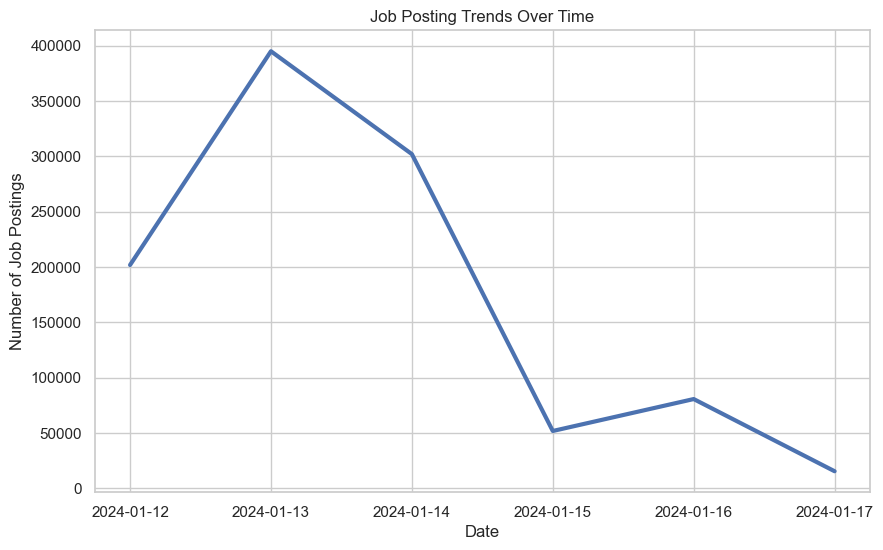

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
linkedin_job_posting['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=3)
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

## Top Skills theo từng công việc

In [13]:
from collections import Counter

In [14]:
df = linkedin_job_posting

grouped_skills = df.groupby('job_title')['job_skills'].sum()

grouped_skills.head()

job_title
"a" softball coach - central middle school                [softball coaching, coaching experience, under...
"accountant"                                              [attention to detail, journal entries, account...
"attorney" (gov appt/non-merit) jobs                      [law, state and federal laws rules and regulat...
"b" baseball coach - central middle school                [baseball coaching, coaching experience, under...
"full time" sales assistant, westboro location, ottawa    [sales, merchandising, marketing, baking, cust...
Name: job_skills, dtype: object

In [15]:
most_common_skills = grouped_skills.apply(lambda x: Counter(x).most_common(5))

In [16]:
common_skills_df = most_common_skills.reset_index()
common_skills_df.head()

,job_title,job_skills
0,"""a"" softball coach - central middle school","[(softball coaching, 1), (coaching experience,..."
1,"""accountant""","[(accounting, 2), (attention to detail, 1), (j..."
2,"""attorney"" (gov appt/non-merit) jobs","[(law, 1), (state and federal laws rules and r..."
3,"""b"" baseball coach - central middle school","[(baseball coaching, 1), (coaching experience,..."
4,"""full time"" sales assistant, westboro location...","[(sales, 1), (merchandising, 1), (marketing, 1..."


In [17]:
common_skills_df.to_csv('top_skills_job.csv', index=False)

## Top công việc theo từng quốc gia

In [18]:
from collections import Counter

In [42]:
df = linkedin_job_posting
grouped_countries = df.groupby('search_country')['job_title']

grouped_countries.head()

0                    triage rn- michigan heart aa office
1                                        finance manager
2                    ultrasound technologist- registered
3      licensed clinical psychologist - outpatient - ...
4                    department manager up to $37,000/yr
11     cibc | analyste principal, intégration des cli...
15                                           staff nurse
37                                     financial adviser
49     senior structual engineer / stress engineer in...
63     sales executive ( health information systems) ...
87                       mortgage and protection adviser
107                  assistant manager - sherway gardens
135    general practitioner | ipswich dpa | skin canc...
212                emergency medicine physician adelaide
232     construction supervisor [the shaw group limited]
282    human resources manager - sunnybrook departmen...
292                                   warehouse operator
298    strategic account manage

In [43]:
most_common_jobs = grouped_countries.apply(lambda x: Counter(x).most_common(10))

In [46]:
common_jobs_df = most_common_jobs.reset_index()
common_jobs_df.head()

,search_country,job_title
0,australia,"[(registered nurse, 196), (senior educator, 11..."
1,canada,"[(customer service representative, 210), (regi..."
2,united kingdom,"[(registered nurse, 539), (customer service ad..."
3,united states,"[(customer service representative, 7194), (lea..."


In [47]:
common_jobs_df.to_csv('top_jobs_country.csv', index=False)